In [1]:
# importing modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Parameters
delta = 0.99
gamma = 1
l = 2
rf = 1.0303

In [3]:
#calculating consumption growth
epsilon = np.random.standard_normal(100000)
g = (np.exp(0.02 + 0.02 * epsilon)).mean()
g2 = (np.exp(0.02 + 0.02 * epsilon))

In [4]:
# function to calculate utility from financial gain / loss
def calculateUtility(x):
    tempUtilityList = []
    riskFree = 1.0303
    for i in x:
        if(i >= rf):
            tempUtilityList.append(i-riskFree)
        else:
            tempUtilityList.append(2*(i-riskFree))
    return np.mean(tempUtilityList)

In [5]:
#calculating values of kappa using bisection search
kappa = []
b_0 = np.arange(0,10.1,0.1)
for i in b_0:
    kappaMin = 1
    kappaMax = 1.1
    tempKappa = (kappaMin + kappaMax) * 0.5
    tempRs =  g2 * tempKappa
    utility = calculateUtility(tempRs)
    error = 0.99 * i * utility + 0.99 * tempKappa - 1
    while abs(error) > 1e-5:
        if error < 0:
            kappaMin = tempKappa
        else:
            kappaMax = tempKappa
        tempKappa = (kappaMin + kappaMax) * 0.5
        tempRs =  g2 * tempKappa
        utility = calculateUtility(tempRs)
        error = 0.99 * i * utility + 0.99 * tempKappa - 1
    kappa.append(tempKappa)

In [6]:
#calculating PD ratio and expected market return
kappaArray = np.array(kappa)
pdRatio = 1 / (kappaArray - 1)
marketReturn = kappaArray * g
df = pd.DataFrame()
df['ExpectedMarketReturn'] = marketReturn
df['b_0'] = b_0
df['priceDividendRatio'] = pdRatio


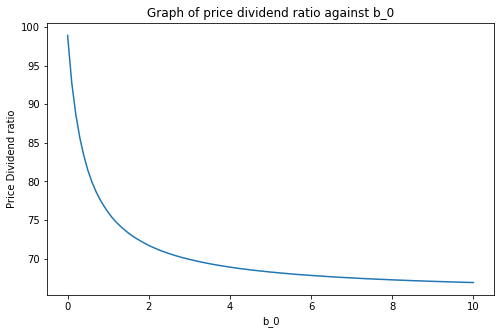

In [7]:
# ploting graph of price - dividend ratio against b_0

plt.figure(figsize = (8, 5))
plt.plot(df['b_0'],df['priceDividendRatio']) 
plt.xlabel("b_0")
plt.ylabel("Price Dividend ratio")
plt.title("Graph of price dividend ratio against b_0") # P/D
plt.show()

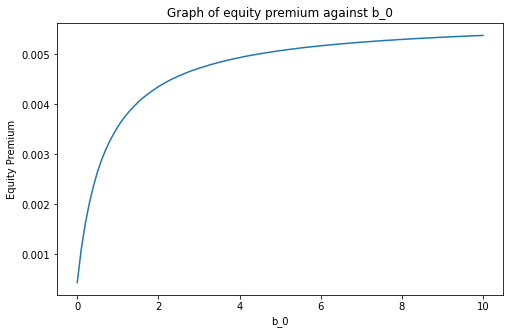

In [8]:
# ploting graph of equity premium against b_0

plt.figure(figsize = (8, 5))
plt.plot(df['b_0'],df['ExpectedMarketReturn']-rf) 
plt.xlabel("b_0")
plt.ylabel("Equity Premium")
plt.title("Graph of equity premium against b_0") #Market Risk Premium
plt.show()

**Q: Briefly explain the economic significance of the investor's utility function for financial gain or loss [i.e., ν(R)], as well as the economic significance of the parameters b0 and λ**

<u>Answer</u>
<br>
<u>Utility function for financial gain or loss</u>

Having the investor’s utility function for recent financial gain or loss in investors’ preference allows us to utilise the concept the prospect theory, where financial gain and loss are measured relative to reference level(risk free rate in this case) and investors exhibits loss aversion - more sensitive to losses than gains

<u>b0</u>

b0 determines the amount of emphasis the investor put on utility of financial gain or loss as compared to utility of consumption. Thus, as b0 increases, required equity premium will increase as well.

<u>Lambda</u>

Lambda captures the degree of loss aversion of the investor, which controls the steepness utility function for losses. As investors are more sensitive to financial loss then gains, as losses increases value of lambda will increase too. Lambda has an initial value of 2, but if there are prior gains or losses, lambda will be 1 or greater than 2 respectively.